### Python data science basics and likelihood calculations

***

DBW 2023-01-17

To make best use of this notebook, Edit > Clear all outputs, then run desired cells sequentially

This is a **markdown cell** where information can be written and formatted in various ways using different flags.

#### Header sizes can be small-ish

### or bigger

## or extra big

## plus **bolded** or *italicized*

***
with lines and other features too
***

***
The other major cell type are **code cells** that contain Python code that can be executed through a connected iPython server

Install the required packages; for docs for details

Numpy: https://numpy.org/doc/
<br>
Pandas: https://pandas.pydata.org/docs/
<br>
Scipy: https://docs.scipy.org/doc/scipy/
<br>
Matplotlib: https://matplotlib.org/stable/index.html
<br>

*If already installed, can comment out the next line, or just not run the cell*

In [1]:
!pip install numpy pandas scipy matplotlib

Then import the required libraries. 

By using the  `import X as Y`  structure, we can give nicknames to libraries that can make things quicker to type. This is extremely common for popular libraries such as numpy, pandas, and matplotlib that are used frequently when coding in Python

We can also selectively import some functions from libraries by using the structure  `from library.sub_library import function` 

In [2]:
## Numpy and Pandas for numerical operations and data frames, respectively
import numpy as np, pandas as pd

## Matplotlib for data visualization
import matplotlib.pyplot as plt

## Import curve fit and stats sublibrary from scipy
from scipy.optimize import curve_fit
import scipy.stats as stats


Next, let's simulate some data to do some basic analyses

In [4]:
## Generate 21 points that are equally spaced from 0 to 10

xt = np.linspace( 0, 10, 21 ) # Linspace takes ( start, end, n_points )

xt

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [5]:
## np.arange works similarly, but uses the step size rather than the # of points

## It is standard practice in bounds that bounds are left inclusive and right exclusive, i.e. [L,U)
## So if we want to include 10.0 as the final point, we need to set the final point to 10.5

arange_xt = np.arange( 0, 10.5, 0.5, ) # ( lower bound, upper bound, step size )

xt == arange_xt

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Let's linearly transform the data with slope = 2 and intercept = 1, plus add some gaussian noise with $\mu$ = 0 and $\sigma$ = 1.5

Normally, calling a random generator like rvs will produce semi-random values, but by fixing the seed (the `random_state`), then the values will be deterministic

In [10]:
seed = 3447

yt = 2*xt + 1 + stats.norm.rvs( loc=0, scale=1.5, size=len(xt), random_state=seed, )
yt

array([ 2.06747086,  3.68335847,  2.84990357,  5.77187016,  6.16209308,
        6.45058206,  9.68854343,  8.51799846,  9.98448286, 12.60752005,
       10.91477766, 14.20489117, 12.81274999, 16.42732583, 13.74888787,
       16.96915345, 16.5763266 , 18.4571479 , 17.28472798, 20.11522813,
       22.24447658])

Let's link the X and Y values into a data frame, and give them column names

In [11]:
## We can initialize pandas data frames using python dictionaries where key = column name, value = arrays of values

df = pd.DataFrame( { 'X_values' : xt, 'Y_values': yt, } )

df

,X_values,Y_values
0,0.0,2.067471
1,0.5,3.683358
2,1.0,2.849904
3,1.5,5.771870
4,2.0,6.162093
5,2.5,6.450582
6,3.0,9.688543
7,3.5,8.517998
8,4.0,9.984483
9,4.5,12.607520


We can save these data as a CSV file and read them back in as a new data frame

In [14]:
output_filename = 'probability_simulations_data1.csv'

df.to_csv( output_filename, header=True, index=False )

read_df = pd.read_csv( output_filename,  )

read_df

,X_values,Y_values
0,0.0,2.067471
1,0.5,3.683358
2,1.0,2.849904
3,1.5,5.771870
4,2.0,6.162093
5,2.5,6.450582
6,3.0,9.688543
7,3.5,8.517998
8,4.0,9.984483
9,4.5,12.607520


Use matplotlib to make a scatter plot of the data

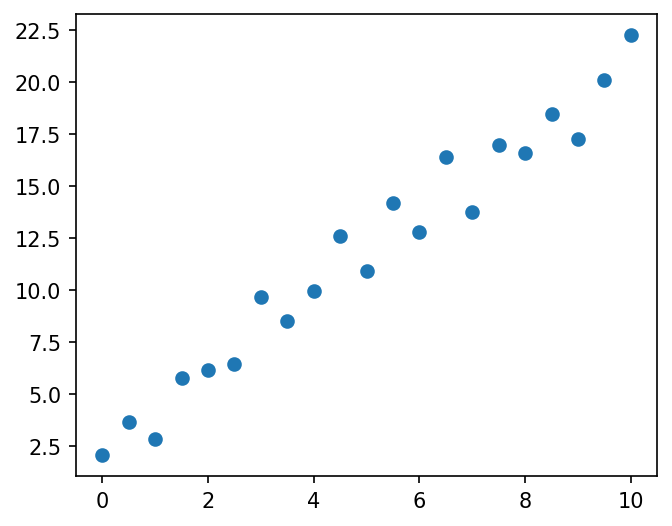

In [15]:
## The visual outputs of matplotlib are organized into Figures with Axes. 
## The simplest way to set this up is to initialize both using the plt.subplots command

## One axis in the figure
fig, ax = plt.subplots( figsize=(5,4), dpi=150, ) # Can set other features such as image size and dpi

ax.scatter( df.X_values, df.Y_values, )

Or, if instead of typing x/y values into vectors, we can conveniently read them from files using pandas. This also avoids the risk of introducing typos. Place/upload a csv file with the data into aolfder accessible by your Jupyter server, then replace the file_name variable with the path to your data.

Below, we assume that the file bind-data-1.csv has been placed in the current directory. In Colab, that is in "Files".

In [4]:
df = pd.read_csv( 'binding-data-1.csv', comment='#' )
df # This command on its own will output some of the contents of the data frame

,[L],Y_monomer,Y_tetramer
0,0.25,0.180,0.0000
1,1.00,0.460,0.0125
2,2.50,0.700,0.0450
3,4.00,0.790,0.1000
4,7.00,0.860,0.2700
5,10.00,0.900,0.5000
6,13.00,0.920,0.6800
7,16.00,0.935,0.7800
8,19.00,0.950,0.8550
9,25.00,0.960,0.9225


It is always a good idea to first plot data to see 

In [6]:
stats.linregress( df.X, df.Y )

LinregressResult(slope=0.1006547619047619, intercept=0.30833333333333335, rvalue=0.8392603199609209, pvalue=0.00917123406330943, stderr=0.02662227473552412, intercept_stderr=0.11136896543310529)

In [8]:
df['Xz'] = (df.X-np.mean(df.X))/np.std( df.X, ddof=1, )
df['Yz'] = (df.Y-np.mean(df.Y))/np.std( df.Y, ddof=1, )

1/(len(df)-1)*np.sum( df.Xz*df.Yz )

0.8392603199609209

In [7]:
?np.std

Signature:
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a standard deviation is performed over
    multiple axes, instead of a single axis or all the axes as before.
dtype : dtype, optional
    Type to use in computing the standard deviation. For arrays of
    integer type the default is float64, for 